In [1]:
import pandas as pd, sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect("../data/checking-logs.sqlite")


In [2]:
commits = pd.read_sql("""
    SELECT uid, timestamp
    FROM checker
    WHERE uid LIKE 'user_%'
      AND status = 'ready'
      AND numTrials = 1
""", conn)

In [3]:
# Temporary data
commits["timestamp"] = pd.to_datetime(commits["timestamp"])
commits["hour"] = commits["timestamp"].dt.hour
commits["weekday"] = commits["timestamp"].dt.weekday
commits["is_weekend"] = commits["weekday"] >= 5

In [4]:
# Split
working = commits[commits["is_weekend"] == False]
weekend = commits[commits["is_weekend"] == True]

In [5]:
# Group by hour and calculate average commit count (by day)
working_avg = working.groupby("hour").size() / working["timestamp"].dt.date.nunique()
weekend_avg = weekend.groupby("hour").size() / weekend["timestamp"].dt.date.nunique()

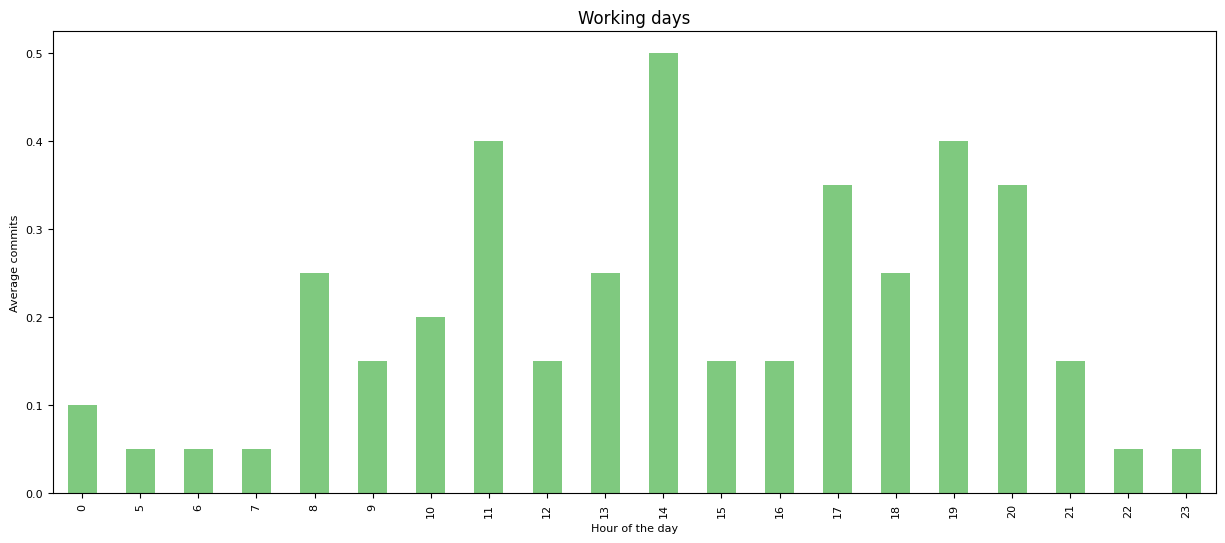

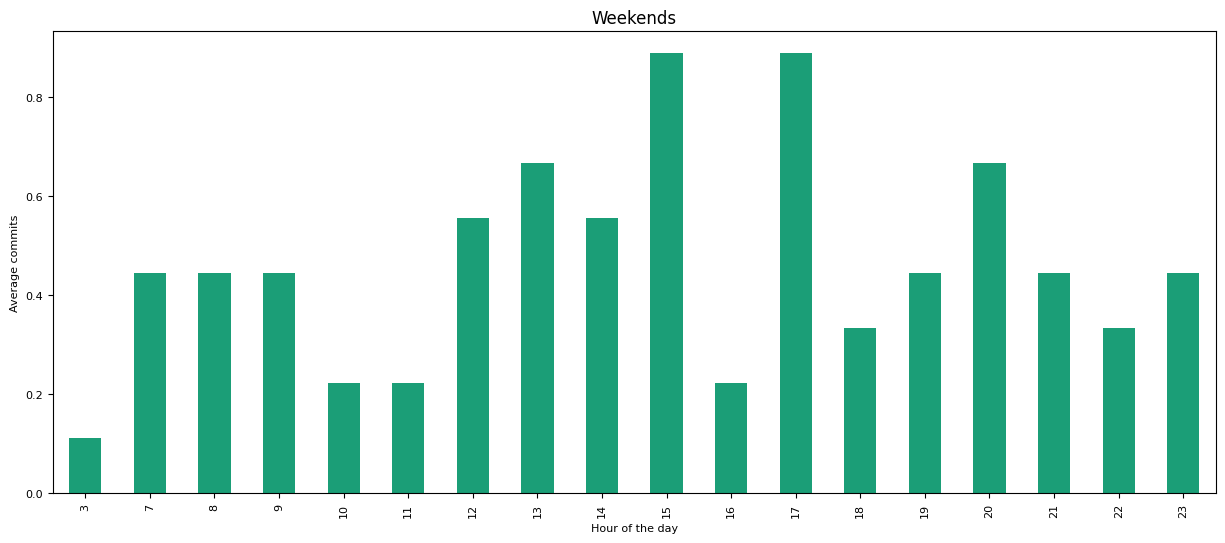

In [6]:
# Working days schedule
ax1 = working_avg.plot(
    kind="bar",
    figsize=(15, 6),
    fontsize=8,
    colormap="Accent",
    title="Working days"
)
ax1.set_xlabel("Hour of the day", fontsize=8)
ax1.set_ylabel("Average commits", fontsize=8)
plt.show()

# Weekend schedule
ax2 = weekend_avg.plot(
    kind="bar",
    figsize=(15, 6),
    fontsize=8,
    colormap="Dark2",
    title="Weekends"
)
ax2.set_xlabel("Hour of the day", fontsize=8)
ax2.set_ylabel("Average commits", fontsize=8)
plt.show()

In [7]:
# Find the hour with the most commits
max_working_hour = working_avg.idxmax()
max_weekend_hour = weekend_avg.idxmax()
print("The hour with the most commits on working days is", max_working_hour)
print("The hour with the most commits on weekends is", max_weekend_hour)

The hour with the most commits on working days is 14
The hour with the most commits on weekends is 15


In [8]:
conn.close()

## Вопрос:
Отличается ли динамика в рабочие дни и выходные?

Час с наибольшим количеством коммитов в рабочие дни — **14**, а в выходные — **15**.
